# **GmTune: AI-Assisted Design of Linearly Tunable Transconductors via Multi-Objective Optimization**

| Name                    | Affiliation                                                                                          | IEEE Member | SSCS Member |
|:-----------------------:|:----------------------------------------------------------------------------------------------------:|:-----------:|:-----------:|
| Jinhai Hu               | Nanyang Technological University, Singapore; <br /> Institute of Microelectronics, A*STAR, Singapore | Yes         | Yes         |
| Zhongyi Zhang           | Nanyang Technological University, Singapore                                                          | Yes         | Yes         |
| Runtian Bian            | Nanyang Technological University, Singapore                                                          | No          | No          |
| Zhaoyang Cao            | Nanyang Technological University, Singapore                                                          | Yes         | Yes         |
| Wang Ling Goh (Advisor) | Nanyang Technological University, Singapore                                                          | Yes         | Yes         |
| Yuan Gao (Advisor)      | Institute of Microelectronics, A*STAR, Singapore                                                     | Yes         | Yes         |

## Abstract

This notebook presents GmTune, an AI-assisted methodology for the design of linearly tunable transconductors through multi-objective optimization. The approach integrates Bayesian optimization with Gaussian processes to efficiently explore the design space, balancing conflicting performance metrics such as power, bandwidth, transconductance (Gm), and noise. The circuit design leverages a CMOS pseudodifferential transconductor with common-mode feedforward (CMFF), ensuring stability and linearity across a broad operating range. Simulation results show significant improvements in key performance parameters, such as expanded linear regions and reduced power consumption, compared to prior designs. The methodology demonstrates effective optimization under varying thresholds and voltages, making it adaptable across different fabrication processes. This approach offers a practical solution for high-performance, low-power analog circuit design, with potential for further refinement through systematic optimization techniques. It also offers potential solutions to address the need for extensive redesign efforts, which hinder scalability and efficiency when adapting circuits across fabrication processes.

<hr style="border:2px solid grey">

## Introduction

This repository contains the code for AI-assisted design and optimization of a tunable CMOS transconductor with common-mode feedforward. Designing linearly tunable transconductors is critical for optimizing the performance of analog circuits in various applications. Traditional approaches often face challenges in balancing multiple performance metrics, such as power consumption, linearity, bandwidth, and noise. To address these challenges, we introduce GmTune, an AI-assisted framework that utilizes Bayesian optimization for multi-objective optimization (MOO). This methodology allows for efficient tuning of transconductance while managing trade-offs between conflicting design objectives. We apply this technique to a CMOS pseudodifferential transconductor with a common-mode feedforward (CMFF) mechanism, optimizing its design for linearity, power, and bandwidth.

Linearly tunable transconductors, such as those designed using GmTune, have broad applicability across various domains. One prominent example is in the design of gm-C delay cells for ultrasound beamforming, where precise control over signal delays is required for accurate image formation. Additionally, they are valuable in Variable Gain Amplifiers (VGAs), where dynamic adjustment of gain ensures optimal signal strength in communications and audio systems, and in Data Converters (DACs and ADCs), where tunable transconductance improves accuracy and resolution in high-speed conversion processes

<hr style="border:2px solid grey">

## Architecture

![GmCMFF.png](figures/GmCMFF.png)

This circuit structure employs a CMOS pseudodifferential transconductor with common-mode feedforward (CMFF) to achieve a linearly tunable transconductance [[1]](#ref1). Negative feedback is introduced via transistor `M3` to stabilize the source voltage `VS` of `M1A` in the flip-flop voltage follower configuration. Since the current flowing through `M1A` is maintained constant at `IB`, when the AC component `Vin` superimposed on the common-mode voltage `VCM` becomes `VCM ± 1/2 Vin`, this variation is accurately transferred to `VS`, resulting in `VS ± 1/2 Vin`. 

Transistors `M1A`，`M1B` and `M1C` have their sources connected together. The gain of the replicated current in the `M1B` branch is determined by the size ratio of `M1A` to `M1B` and `M1C`, as well as the voltage difference between the gate voltage `VG` and `VCM`. The output differential current is determined by the variations in the currents through `M1B` and `M2B`, expressed as: 

<a id="eq1"></a>
\begin{equation} 
  I_{od} = I_{o2} - I_{o1} = 4 \cdot K (V_{GS}-V_{TH}) \cdot V_{in}
\tag{1}
\end{equation} 

where $K = \frac{1}{2} \mu C_{ox} \frac{W}{L}$. Thus, the transconductance $Gm$ is:

<a id="eq2"></a>
\begin{equation} 
  G_m = \frac{I_{od}}{V_{in}} = 4 \cdot K(V_{GS}-V_{TH})
\tag{2}
\end{equation}

If the common-mode voltage `VCM` remains constant, then the source voltage `VS` of transistor `M1` remains unchanged. According to the equations, the transconductance `Gm` have a linear relationship with the gate voltage `VG`. The circuit exhibits a dominant pole at $s_p = \frac{g_{m4}}{2C_{gs4}}$ where $gm4$ is the transconductance of transistor `M4`. Variable-gain amplifiers are implemented on both sides using 2 kΩ resistors and current sources to measure the gain, thereby obtaining the transconductance `Gm`. 

#### Advantages of This Design  
The use of Common-Mode Feedforward (CMFF) in the output stage simplifies the circuit by replicating the branch current and subtracting the common-mode current to suppress the common-mode component. This approach eliminates the need for a common-mode feedforward circuit, which not only reduces circuit area and power consumption but also avoids the stability issues typically associated with feedforward mechanisms.

#### Limitations
1. Limited Precision in Common-Mode Voltage Control: 
   The precision of common-mode voltage control is inherently constrained and susceptible to process and environmental variations. As a result, the design is better suited for applications where precise common-mode control is not critical but low power consumption is a priority.  

2. Challenges in Manual Tuning:  
   The numerous factors influencing performance make manual tuning of the circuit to achieve optimal operation challenging.  

3. Design Adaptability Across Processes:
   Implementing the same circuit design on different fabrication processes often necessitates adjustments in MOS transistor sizes and control voltages, requiring significant design effort.

#### Potential Optimizations 
1. Bandwidth Adjustment: 
   The dominant pole introduced by the gate of transistor `M4` impacts the bandwidth. By modifying the width of `M4`, its transconductance ($g_{m4}$) and gate capacitance can be adjusted, enabling control over the bandwidth.  

2. Transconductance (`Gm`) Optimization:  
   The transconductance `Gm` depends linearly on the gate voltage `VG` and is proportional to the W/L ratio of transistor `M1`. Increasing the W/L ratio enhances `Gm`, but excessive `Gm` leads to higher branch currents in `M1B` and `M1C` for the same `VG`, resulting in increased power consumption.  

3. Constraints on Maximum `VG`:  
   The maximum `VG` is limited by the behavior of transistors `M4` and `M3`. When `VG` becomes too large:
   - The increased current through `M1B` and `M1C` raises the current through `M3`, increasing $V_{gs3}$ and pushing `M3` into the linear region.  
   - Similarly, the elevated current increases $V_{gs4}$, which can lead to `M1C` entering the linear region as well.

4. Constraints on Minimum `VG`:  
   The lower limit of `VG` is influenced by the source voltage `VS` of `M1`. For `M1B` and `M1C` to remain in saturation, $V_G - V_S > V_{th}$ must hold. Lowering the common-mode voltage `VCM` reduces `VS`, which in turn decreases the minimum `VG` within the linear operating range of `Gm`.  

These optimizations highlight the delicate interplay between design parameters and operating conditions, emphasizing the importance of systematic optimization methods, such as Bayesian optimization, to streamline the process and achieve optimal performance across different scenarios

<hr style="border:2px solid grey">

## Algorithm

### Bayesian Optimization

In complex engineering challenges, we often face the need to fine-tune parameters through iterative evaluations that are both computationally expensive and noisy. When the parameter space is large, or when some parameters are continuous, traditional methods like exhaustive factorial designs (e.g., grid search) or global optimization techniques quickly become impractical due to the sheer number of required evaluations.

This is where Bayesian optimization becomes a powerful alternative. Unlike brute-force methods, Bayesian optimization begins by constructing a smooth surrogate model of the outcomes using Gaussian processes (GPs), based on the (potentially noisy) data collected from previous experimental runs. More details on the GP model can be found below. This surrogate model allows for predictions at untested parameter settings, along with quantifying the uncertainty associated with those predictions. These predictions, along with their uncertainty estimates, are combined to form an acquisition function, which measures the value of evaluating a specific parameter configuration. The acquisition function is then optimized to identify the most promising configuration to test. After observing the results at that configuration, the surrogate model is updated, and the process repeats until convergence. This approach is adaptive, as the predictions and uncertainty estimates are continuously refined with each new observation.

Expected improvement ($EI$) is chosen as the acquisition function in this work. It incentivizes the evaluation of the objective function ($f$) based on the expected improvement relative to the current best. If $f^*$ represents the current best observed outcome, and our objective is the maximize $f$, then $EI$ is defined as:

<a id="eq3"></a>
\begin{equation} 
  EI(x) = E[max(Obj(x) - Obj^*, 0)]
\tag{3}
\end{equation} 

Here, $x$ is a potential parameterization, evaluated performance ($Obj$) represents objective function $f$, $Obj(x)$ is the predicted outcome for that parameterization, and $E[.]$ denotes the expectation. The parameterization with the highest $EI$ is selected and evaluated in the next step. Once the parameter space is adequately explored, $EI$ narrows in on locations where the objective function is converged.

In the context of engineering problems, this approach is particularly valuable because it can incorporate prior knowledge, handle noisy data, and adapt to complex, non-linear relationships between parameters. As a result, Bayesian optimization enables practical and efficient tuning of parameters, even in scenarios where traditional methods fail due to computational or time constraints.


### Multi-Objective Optimization

Multi-objective optimization (MOO) is indispensable in domains like circuit design and optimization, where multiple conflicting performance metrics must be optimized simultaneously. In circuit design, engineers often face trade-offs between objectives such as power consumption, speed, area, gain, noise, and stability. These objectives are rarely independent, and improving one metric often comes at the expense of others. MOO provides a principled framework for navigating these trade-offs, enabling designers to make informed decisions about the best compromises for their specific applications.

The essence of MOO lies in finding the Pareto front-a set of optimal solutions where no single objective can be improved without degrading another. In the context of circuit design, this allows designers to explore a range of potential solutions, each representing a different balance of trade-offs. For example, one solution might prioritize low power consumption at the cost of speed, while another might favor high speed with a modest increase in noise. Understanding these trade-offs is crucial for tailoring circuits to meet diverse application requirements.

The application of MOO in circuit design also highlights its importance in addressing real-world challenges. Circuit performance metrics often exhibit nonlinear and interdependent behaviors, making it difficult to optimize them using single-objective approaches. MOO not only accounts for these complexities but also provides a comprehensive view of the trade-off space. This capability is especially valuable when designing circuits for emerging technologies, where performance demands are stringent and multidimensional.

By embedding Pareto efficiency principles, Ax enables the systematic exploration of these trade-offs. This empowers circuit designers to identify solutions that best align with their design goals, ensuring efficient resource utilization and optimal performance. In this context, MOO is not merely a tool for optimization but a critical methodology for understanding and addressing the intricate relationships between competing design objectives in circuit engineering.

<hr style="border:2px solid grey">

## Methodology Workflow <a id="list_of_content"></a>

Following steps shows the detailed working flow. We have included cell outputs for your reference. 

### 1. [Framework Initialization](#framework-initialization)
### 2. [GmSpice Model Setup](#gmspice-model-setup)
### 3. [Multi-Objective Optimiztion](#multi-objective-optimization)
### 4. [Circuit Backtesting](#circuit-backtesting)

<hr style="border:2px solid grey">

### Step 1. Framework Initialization <a id="framework-initialization"></a>

In [23]:
from __future__ import print_function

import os
import numpy as np
import matplotlib.pyplot as plt

import src.model as mdl
import src.visualizing as vs 

from ax.service.ax_client import AxClient, ObjectiveProperties

import importlib
importlib.reload(mdl)
importlib.reload(vs)

print("All modules reloaded")

All modules reloaded


In [24]:
# -------------------- Globals --------------------#
# Global PATH Config
SPICE_PATH = "src/spice/"
CKPT_PATH = "ckpts/"

In [ ]:
# -------------------- Define customized Argparse --------------------#
class Argparse:
    def __init__(self, **kwargs):
        for key, value in kwargs.items():
            setattr(self, key, value)

    def print_args(self):
        argparse_dict = vars(self)
        for key, value in argparse_dict.items():
            print(f"{key}: {value}")

args = Argparse(
    # Circuit parameters
    VDD = 1.8,          # V
    VCM = 1.3,          # V
    WM1 = 12,       
    WM3 = 10,
    WM4 = 20,

    # Simulation parameters
    VG_swing = 0.3,     # V
    VG_step = 0.02,     # V

    # Optimization parameters
    num_epochs = 35,
    linear_threshold = 0.99, # r2 threshold

    VCM_range = [0.8, 1.4],
    WM1_range = [4, 50],
    WM3_range = [4, 50],
    WM4_range = [4, 50],

    Vg_threshold = 0.2,     # V
    Gm_threshold = 1.0,     # mA/V
    Pw_threshold = 1.1,     # mW 
    Bw_threshold = 0.4,     # GHz
)

# Uncomment to Print all arguments
args.print_args()

VDD: 1.8
VCM: 1.3
WM1: 12
WM3: 10
WM4: 20
VG_swing: 0.3
VG_step: 0.02
num_epochs: 35
linear_threshold: 0.99
VCM_range: [0.8, 1.4]
WM1_range: [4, 50]
WM3_range: [4, 50]
WM4_range: [4, 50]
Vg_threshold: 0.2
Gm_threshold: 1.0
Pw_threshold: 1.1
Bw_threshold: 0.4


#### [Back to List of Content](#list_of_content)

---

### Step 2. GmSpice Model Setup<a id="gmspice-model-setup"></a>

The model developed for this work consists of two main components. The first is model initialization: a tunable transconductor with common-mode feedforward is written into the netlist located at `src/spice/GmCMFF.spice`. This process uses the imported module `src/netlist.py` and incorporates pre-defined circuit parameters `VDD, VCM, WM1, WM3, and WM4`. The second step is the forward pass, during which multiple simulations are performed for `VG` within the range `|VCM - VG| = VG_swing`, using a minimum step size of `VG_step`. For each SPICE simulation, the `src/para.spice` file is updated incrementally with the corresponding `VG` value. The simulation results for `GM - Frequency, Gain - Frequency, I1, I2, IB,` and `IRN - Frequency` are then saved as text files in the `ckpts/` directory."

Here is a detailed explanation of the GmSpice model. The model is implemented in a separate Python file located at `src/model.py`.

**Constructor (`__init__`)**

Initializes the object with parameters related to the circuit and simulation:
- **Circuit Parameters:** 
  - `VDD`: Supply voltage.
  - `VCM`: Common-mode voltage.
  - `WM1`, `WM3`, `WM4`: Transistor widths.
- **Simulation Settings:**
  - `VG_step`: Voltage step size.
  - `linear_threshold`: Linearity threshold.
  - `spice_path`: Path to the SPICE netlist directory.
  - `ckpt_path`: Path to checkpoint files.
- **Netlist Handling:**
  - Sets the path for the SPICE netlist (`GmCMFF.spice`).
  - Calls `nl.write_netlist` to initialize the netlist file.


**Forward Method**

Simulates the circuit for a range of gate voltages (`VG`) and extracts performance metrics:
1. **Gate Voltage Range:**
   - Computes a symmetric range of voltages around `VCM` using `VG_delta` and `VG_step`.

2. **Metrics Computation:**
   - For each `VG`, the netlist parameters are updated, and the SPICE simulation is run.
   - Reads simulation outputs from checkpoint files (`Gm.txt`, `IRN.txt`, `IB.txt`, etc.).
   - Extracts:
     - **Gm:** Transconductance at each `VG`.
     - **BW:** Bandwidth, defined at -3dB of Gm's peak.
     - **IRN:** Input-referred noise at a specific frequency (e.g., 50 MHz).
     - **Power (P):** Total power consumption, calculated from current and `VDD`.

3. **Best Linear Region:**
   - Identifies the most linear region of the Gm curve using `_linear` (based on R² and slope).

4. **Visualization and Output:**
   - Calls `vs.plot_metrics` to visualize metrics.
   - Computes aggregated metrics (e.g., max power, bandwidth) using `_metric`.

**Private Method: `_linear`**

Finds the region of `VG` where `Gm` exhibits the best linearity:
- Iterates over all possible subsets of `VG`.
- Uses `linregress` to calculate the correlation coefficient (R²) for each subset.
- Returns the largest contiguous region with sufficient linearity (`r_value**2` above the threshold).

**Private Method: `_metric`**

Calculates final performance metrics for the best linear region:
- Measures the voltage range, Gm variation, maximum power, peak bandwidth, and minimum input noise.
- Returns these metrics as outputs.

In [26]:
GmTune = mdl.GmSpice(
    VDD = args.VDD,
    VCM = args.VCM,
    WM1 = args.WM1,
    WM3 = args.WM3,
    WM4 = args.WM4,
    VG_step = args.VG_step,
    linear_threshold=args.linear_threshold,
    spice_path = SPICE_PATH,
    ckpt_path = CKPT_PATH,
    verbose = True
)

Netlist file wroten at src/spice//GmCMFF.spice



No compatibility mode selected!


Circuit: ** sch_path: /home/gmtune/src/spice/gmcmff.sch

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 1
i(vi1) = 4.964567e-05
i(vi2) = 6.422125e-08
i(vi3) = 6.422125e-08
i(vi4) = 2.559802e-04
i(vio1) = -1.42109e-14
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 3001
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 101

No. of Data Rows : 1
 


No compatibility mode selected!


Circuit: ** sch_path: /home/gmtune/src/spice/gmcmff.sch

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 1
i(vi1) = 4.964512e-05
i(vi2) = 1.096011e-07
i(vi3) = 1.096011e-07
i(vi4) = 2.559802e-04
i(vio1) = 0.000000e+00
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 3001
Doing analysis at TEMP = 27.000000 and TNOM = 27.000

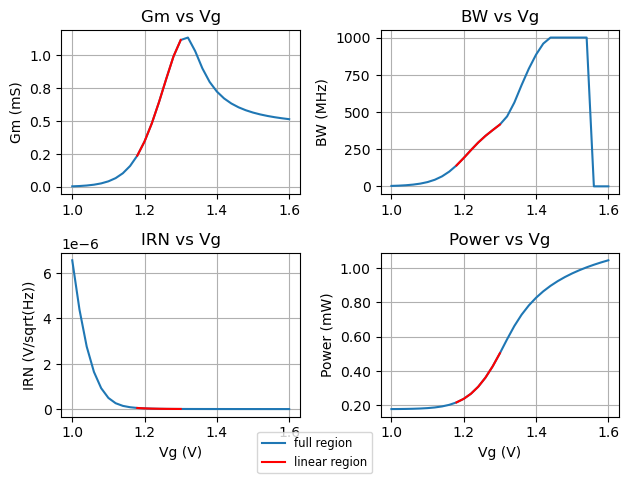

In [27]:
vg_region, gm_region, pw_max, bw_max, irn = GmTune(args.VG_swing)

In [28]:
print(
    "Maximum Tunable Range of Vg: {:.3f} V\n"
    "Maximum Tunable Range of Gm: {:.3f} mA/V\n"
    "Maximum Power Consumption: {:.3f} mW\n"
    "Maximum Bandwidth: {:.3f} GHz\n"
    "Input Referred Noise: {:.3f} nV/sqrt(Hz) @ 50 MHz\n"
    .format(
        vg_region, 
        gm_region,
        pw_max,
        bw_max,
        irn
    )
)

Maximum Tunable Range of Vg: 0.120 V
Maximum Tunable Range of Gm: 0.879 mA/V
Maximum Power Consumption: 0.504 mW
Maximum Bandwidth: 0.416 GHz
Input Referred Noise: 18.614 nV/sqrt(Hz) @ 50 MHz



#### [Back to List of Content](#list_of_content)

---

### Step 3. Multi-Objective Optimization<a id="multi-objective-optimization"></a>

In Ax, Multi-objective optimization (MOO) is implemented using the `ObjectiveProperties` dataclass, which defines each objective in terms of whether it should be minimized or maximized (via the `minimize` boolean). Additionally, objectives can be bounded by thresholds, which represent the designer's region of interest. These thresholds play a vital role in circuit design, as they allow engineers to impose specific performance constraints derived from application requirements or prior knowledge. When such thresholds are unclear, Ax leverages heuristics to infer them, ensuring the optimization process remains flexible and robust even in the absence of explicit guidance.

In this work, we consider to optimize four objectives through tuning four circuit parameters (`VCM, WM1, WM3, WM4`).
- Maximize the tunable linear `Gm` range
- Maximize tunable `Vg` range to ensure `Gm` is less sensitive to small adjustments in `Vg`
- Maximize the bandwidth to ensure the design accommodates the signal range required for various applications (e.g., ultrasound signals typically range from 100 kHz to 10 MHz)
- Minimize the maximum power consumption, which increases as `Vg` increases


In [29]:
# Initiate Client
ax_client = AxClient()
# Create an experiment with required arguments: name, parameters, and objective_name.
ax_client.create_experiment(
    name="GmTuneOpt",  # The name of the experiment.
    parameters=[
        {
            "name": "VCM",  # The name of the parameter.
            "type": "range",  # The type of the parameter ("range", "choice" or "fixed").
            "bounds": args.VCM_range,  # The bounds for range parameters. 
            "value_type": "float",  # Optional, the value type ("int", "float", "bool" or "str"). Defaults to inference from type of "bounds".
            "log_scale": False,  # Optional, whether to use a log scale for range parameters. Defaults to False.
        },
        {
            "name": "WM1",  
            "type": "range",  
            "bounds": args.WM1_range,
            "value_type": "int",
        },
        {
            "name": "WM3",  
            "type": "range",  
            "bounds": args.WM3_range,
            "value_type": "int",
        },
        {
            "name": "WM4",  
            "type": "range",  
            "bounds": args.WM4_range,
            "value_type": "int",
        },
    ],

    objectives={
        "vg_region": ObjectiveProperties(minimize=False, threshold=args.Vg_threshold),
        "gm_region": ObjectiveProperties(minimize=False, threshold=args.Gm_threshold),
        "pw_max": ObjectiveProperties(minimize=True, threshold=args.Pw_threshold),
        "bw_max": ObjectiveProperties(minimize=False, threshold=args.Bw_threshold),
    },
)

[INFO 12-05 20:51:26] ax.service.ax_client: Starting optimization with verbose logging. To disable logging, set the `verbose_logging` argument to `False`. Note that float values in the logs are rounded to 6 decimal points.
[INFO 12-05 20:51:26] ax.service.utils.instantiation: Created search space: SearchSpace(parameters=[RangeParameter(name='VCM', parameter_type=FLOAT, range=[0.8, 1.4]), RangeParameter(name='WM1', parameter_type=INT, range=[4, 50]), RangeParameter(name='WM3', parameter_type=INT, range=[4, 50]), RangeParameter(name='WM4', parameter_type=INT, range=[4, 50])], parameter_constraints=[]).
[INFO 12-05 20:51:26] ax.modelbridge.dispatch_utils: Using Models.BOTORCH_MODULAR since there is at least one ordered parameter and there are no unordered categorical parameters.
[INFO 12-05 20:51:26] ax.modelbridge.dispatch_utils: Calculating the number of remaining initialization trials based on num_initialization_trials=None max_initialization_trials=None num_tunable_parameters=4 num_tr

In [30]:
def evaluate(parameters):
    VCM = parameters.get("VCM", args.VCM)
    WM1 = parameters.get("WM1", args.WM1)
    WM3 = parameters.get("WM3", args.WM3)
    WM4 = parameters.get("WM4", args.WM4)
    GmTune = mdl.GmSpice(
        VDD=args.VDD,
        VCM=VCM,
        WM1=WM1,
        WM3=WM3,
        WM4=WM4,
    )
    vg_region, gm_region, pw_max, bw_max, *_ = GmTune(args.VG_swing)

    return {
        "vg_region": (vg_region, None), 
        "gm_region": (gm_region, None), 
        "pw_max": (pw_max, None), 
        "bw_max": (bw_max, None)
    }

Conduct a trial using the same settings for `VDD, VCM`, and transistor sizing as specific in [[1]](#ref1). According to the simulation results, the tunable linear region differs from the results shown in [[1]](#ref1) due to variations in the technology. It is essential to optimize circuit parameters when implementing the same circuit design on different PDKs to achieve the best performance. Manually adjusting circuit parameters or performing grid search is time-consuming. Therefore, implementing an automatic optimization process is crucial to alleviate the burden on circuit design engineers to a certain extent.

[INFO 12-05 20:51:26] ax.core.experiment: Attached custom parameterizations [{'VCM': 1.3, 'WM1': 12, 'WM3': 10, 'WM4': 20}] as trial 0.


Best linear region of Vg: 1.180 to 1.300
Best linear region of Gm: 0.23730 to 1.11666


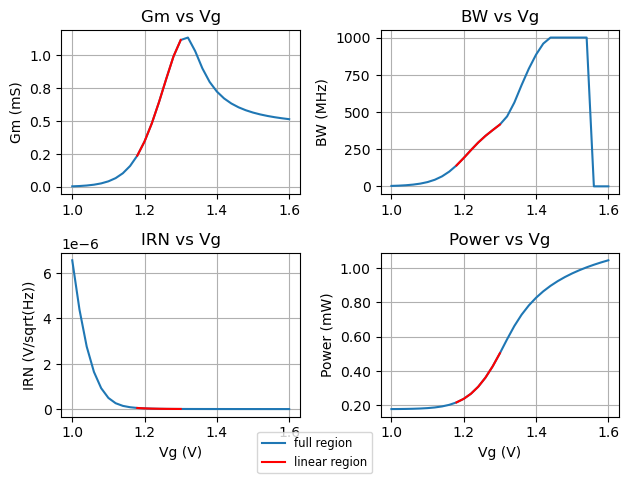

[INFO 12-05 20:52:00] ax.service.ax_client: Completed trial 0 with data: {'vg_region': (0.12, None), 'gm_region': (0.879358, None), 'pw_max': (0.503756, None), 'bw_max': (0.415911, None)}.


In [31]:
# Attach the trial
ax_client.attach_trial(
    parameters={"VCM": args.VCM, "WM1":args.WM1, "WM3":args.WM3, "WM4":args.WM4},
)

# Get the parameters and run the trial 
baseline_parameters = ax_client.get_trial_parameters(trial_index=0)
ax_client.complete_trial(trial_index=0, raw_data=evaluate(baseline_parameters))

[INFO 12-05 20:52:00] ax.service.ax_client: Generated new trial 1 with parameters {'VCM': 0.853363, 'WM1': 15, 'WM3': 18, 'WM4': 44} using model Sobol.


Best linear region of Vg: 0.773 to 0.973
Best linear region of Gm: 0.47606 to 2.71618


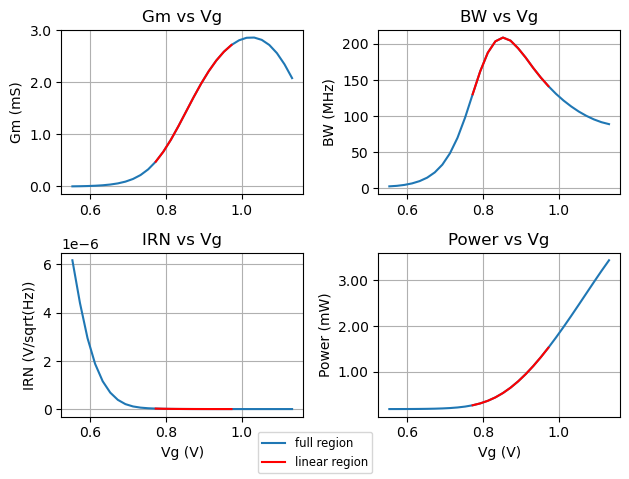

[INFO 12-05 20:52:33] ax.service.ax_client: Completed trial 1 with data: {'vg_region': (0.2, None), 'gm_region': (2.240115, None), 'pw_max': (1.522588, None), 'bw_max': (0.208449, None)}.
[INFO 12-05 20:52:33] ax.service.ax_client: Generated new trial 2 with parameters {'VCM': 0.951378, 'WM1': 19, 'WM3': 27, 'WM4': 16} using model Sobol.


Best linear region of Vg: 0.871 to 1.031
Best linear region of Gm: 0.45220 to 2.54919


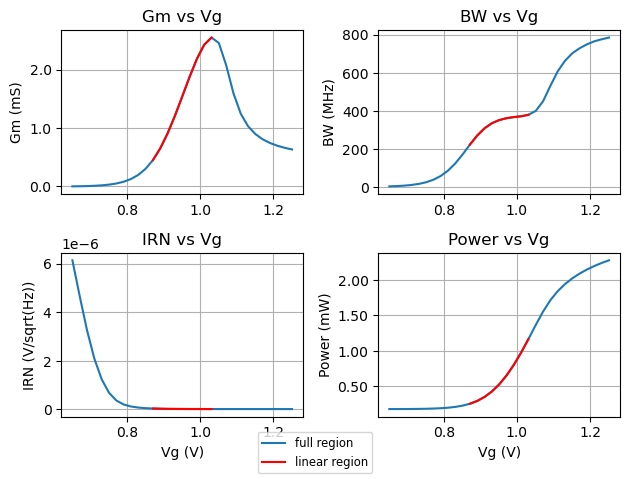

[INFO 12-05 20:53:08] ax.service.ax_client: Completed trial 2 with data: {'vg_region': (0.16, None), 'gm_region': (2.096994, None), 'pw_max': (1.166837, None), 'bw_max': (0.379315, None)}.
[INFO 12-05 20:53:08] ax.service.ax_client: Generated new trial 3 with parameters {'VCM': 1.290777, 'WM1': 26, 'WM3': 37, 'WM4': 7} using model Sobol.


Best linear region of Vg: 1.191 to 1.251
Best linear region of Gm: 0.27305 to 0.77638


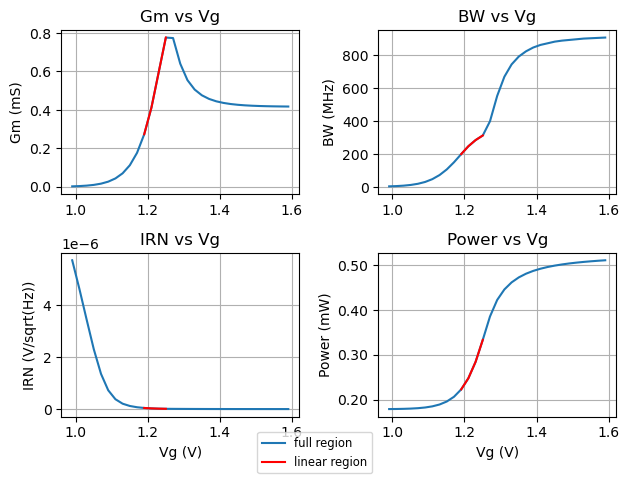

[INFO 12-05 20:53:43] ax.service.ax_client: Completed trial 3 with data: {'vg_region': (0.06, None), 'gm_region': (0.503332, None), 'pw_max': (0.333181, None), 'bw_max': (0.311889, None)}.
[INFO 12-05 20:53:43] ax.service.ax_client: Generated new trial 4 with parameters {'VCM': 1.134392, 'WM1': 49, 'WM3': 50, 'WM4': 32} using model Sobol.


Best linear region of Vg: 1.094 to 1.174
Best linear region of Gm: 0.94285 to 3.15674


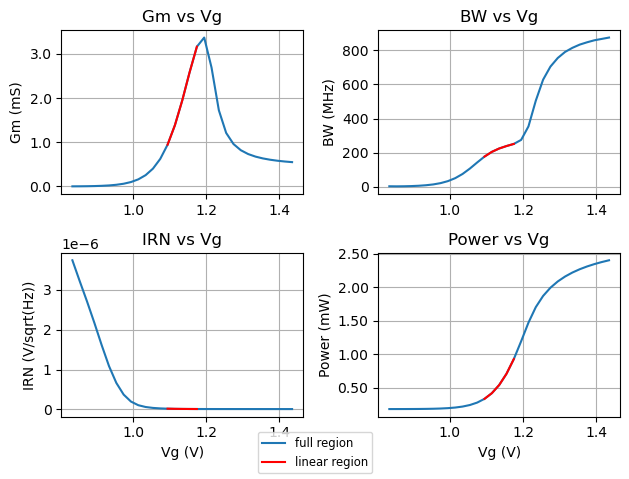

[INFO 12-05 20:54:17] ax.service.ax_client: Completed trial 4 with data: {'vg_region': (0.08, None), 'gm_region': (2.213884, None), 'pw_max': (0.927794, None), 'bw_max': (0.251189, None)}.
[INFO 12-05 20:54:17] ax.service.ax_client: Generated new trial 5 with parameters {'VCM': 1.399598, 'WM1': 41, 'WM3': 7, 'WM4': 47} using model Sobol.


Best linear region of Vg: 1.320 to 1.400
Best linear region of Gm: 0.38081 to 1.35518


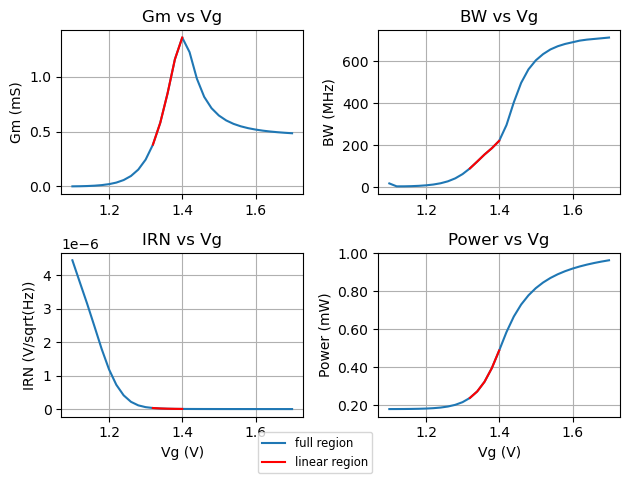

[INFO 12-05 20:54:52] ax.service.ax_client: Completed trial 5 with data: {'vg_region': (0.08, None), 'gm_region': (0.974365, None), 'pw_max': (0.487737, None), 'bw_max': (0.219786, None)}.
[INFO 12-05 20:54:52] ax.service.ax_client: Generated new trial 6 with parameters {'VCM': 1.330803, 'WM1': 25, 'WM3': 32, 'WM4': 36} using model Sobol.


Best linear region of Vg: 1.251 to 1.331
Best linear region of Gm: 0.43287 to 1.46896


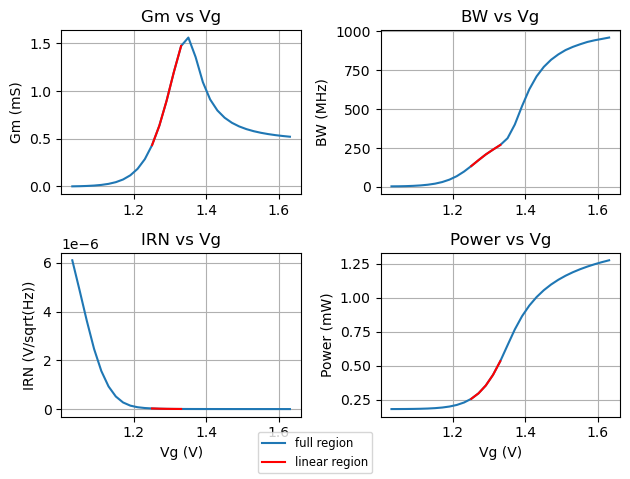

[INFO 12-05 20:55:26] ax.service.ax_client: Completed trial 6 with data: {'vg_region': (0.08, None), 'gm_region': (1.036089, None), 'pw_max': (0.533305, None), 'bw_max': (0.268534, None)}.
[INFO 12-05 20:55:26] ax.service.ax_client: Generated new trial 7 with parameters {'VCM': 1.307014, 'WM1': 25, 'WM3': 39, 'WM4': 44} using model Sobol.


Best linear region of Vg: 1.227 to 1.327
Best linear region of Gm: 0.44131 to 1.81567


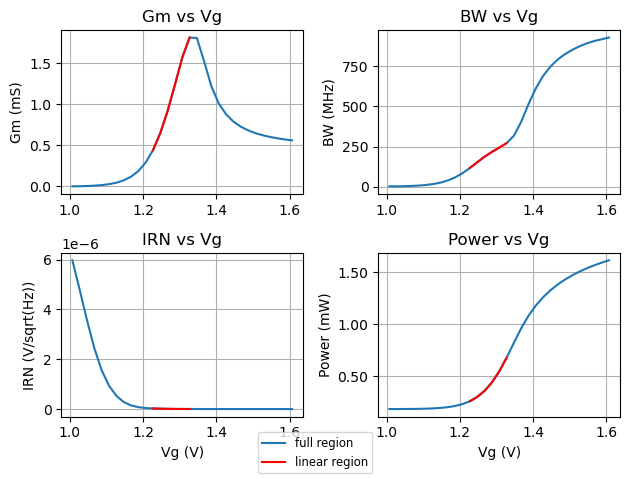

[INFO 12-05 20:56:01] ax.service.ax_client: Completed trial 7 with data: {'vg_region': (0.1, None), 'gm_region': (1.374362, None), 'pw_max': (0.672218, None), 'bw_max': (0.270396, None)}.
[INFO 12-05 20:56:01] ax.service.ax_client: Generated new trial 8 with parameters {'VCM': 1.042706, 'WM1': 35, 'WM3': 36, 'WM4': 36} using model Sobol.


Best linear region of Vg: 1.003 to 1.123
Best linear region of Gm: 0.94097 to 3.74866


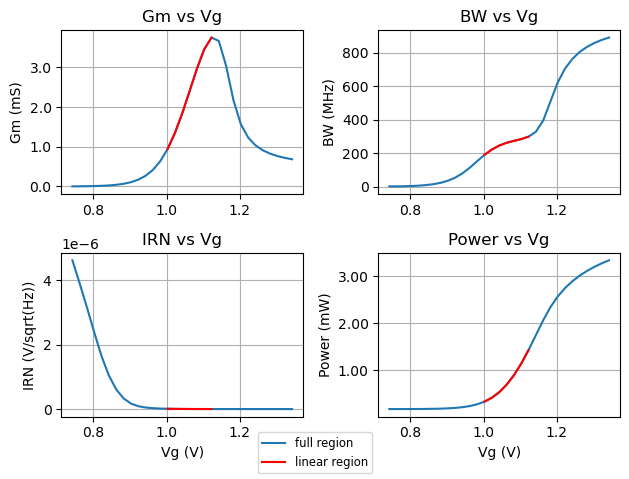

[INFO 12-05 20:56:36] ax.service.ax_client: Completed trial 8 with data: {'vg_region': (0.12, None), 'gm_region': (2.807687, None), 'pw_max': (1.430743, None), 'bw_max': (0.298538, None)}.
[INFO 12-05 20:56:37] ax.service.ax_client: Generated new trial 9 with parameters {'VCM': 1.071051, 'WM1': 13, 'WM3': 13, 'WM4': 17} using model BoTorch.


Best linear region of Vg: 0.971 to 1.131
Best linear region of Gm: 0.33685 to 1.79605


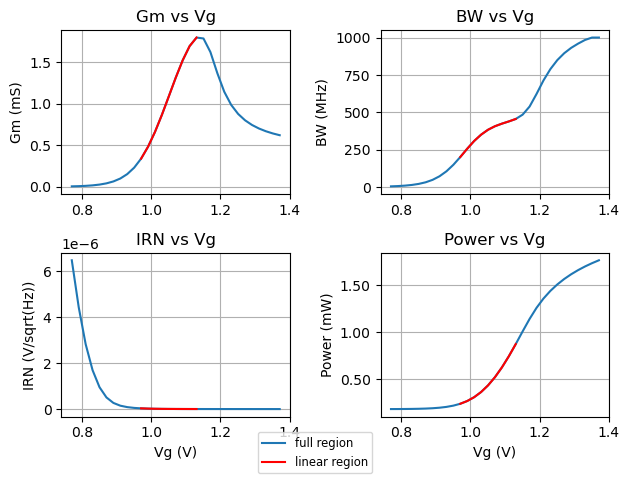

[INFO 12-05 20:57:11] ax.service.ax_client: Completed trial 9 with data: {'vg_region': (0.16, None), 'gm_region': (1.459199, None), 'pw_max': (0.871604, None), 'bw_max': (0.454988, None)}.
[INFO 12-05 20:57:12] ax.service.ax_client: Generated new trial 10 with parameters {'VCM': 0.900602, 'WM1': 11, 'WM3': 9, 'WM4': 17} using model BoTorch.


Best linear region of Vg: 0.801 to 1.001
Best linear region of Gm: 0.34898 to 1.87006


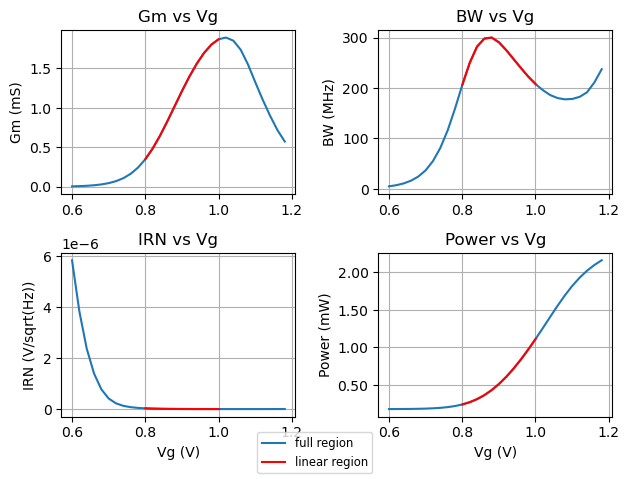

[INFO 12-05 20:57:46] ax.service.ax_client: Completed trial 10 with data: {'vg_region': (0.2, None), 'gm_region': (1.521074, None), 'pw_max': (1.114941, None), 'bw_max': (0.299916, None)}.
[INFO 12-05 20:57:47] ax.service.ax_client: Generated new trial 11 with parameters {'VCM': 1.029159, 'WM1': 4, 'WM3': 20, 'WM4': 19} using model BoTorch.


Best linear region of Vg: 0.829 to 1.129
Best linear region of Gm: 0.13135 to 0.99657


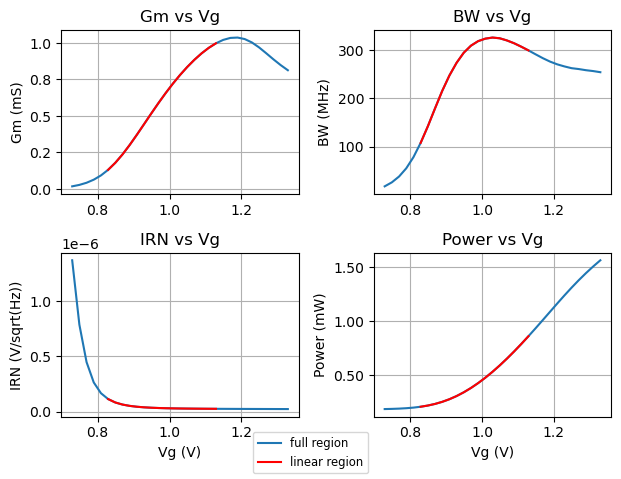

[INFO 12-05 20:58:22] ax.service.ax_client: Completed trial 11 with data: {'vg_region': (0.3, None), 'gm_region': (0.865219, None), 'pw_max': (0.858731, None), 'bw_max': (0.325837, None)}.
[INFO 12-05 20:58:23] ax.service.ax_client: Generated new trial 12 with parameters {'VCM': 1.148324, 'WM1': 6, 'WM3': 17, 'WM4': 10} using model BoTorch.


Best linear region of Vg: 0.988 to 1.168
Best linear region of Gm: 0.17709 to 0.95123


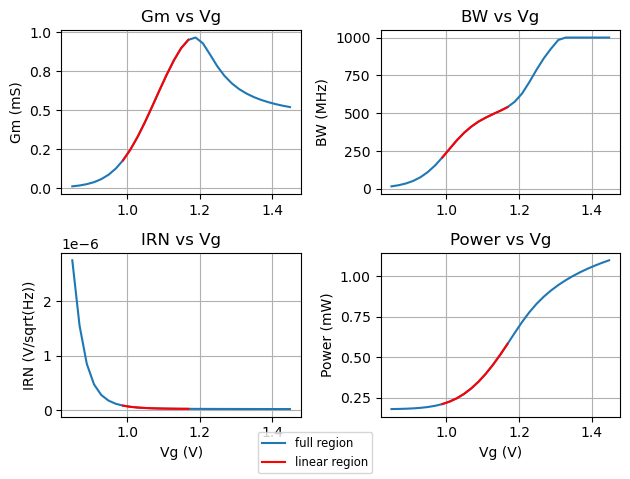

[INFO 12-05 20:58:57] ax.service.ax_client: Completed trial 12 with data: {'vg_region': (0.18, None), 'gm_region': (0.774148, None), 'pw_max': (0.581542, None), 'bw_max': (0.539511, None)}.
[INFO 12-05 20:58:59] ax.service.ax_client: Generated new trial 13 with parameters {'VCM': 1.032312, 'WM1': 8, 'WM3': 22, 'WM4': 6} using model BoTorch.


Best linear region of Vg: 0.892 to 1.052
Best linear region of Gm: 0.20307 to 1.09523


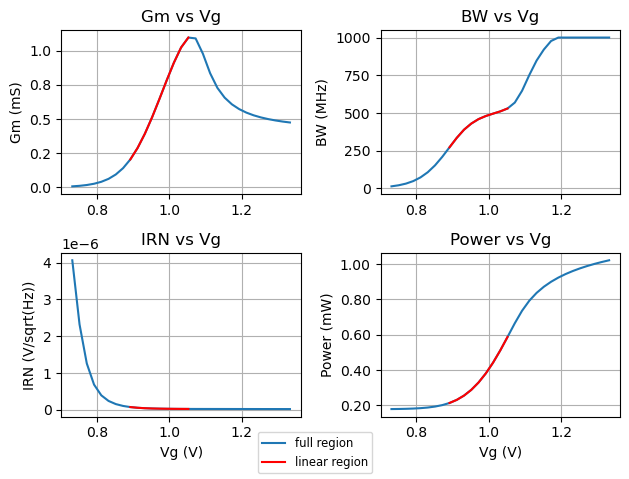

[INFO 12-05 20:59:33] ax.service.ax_client: Completed trial 13 with data: {'vg_region': (0.16, None), 'gm_region': (0.89216, None), 'pw_max': (0.586585, None), 'bw_max': (0.529663, None)}.
[INFO 12-05 20:59:34] ax.service.ax_client: Generated new trial 14 with parameters {'VCM': 1.082124, 'WM1': 31, 'WM3': 4, 'WM4': 4} using model BoTorch.


Best linear region of Vg: 1.002 to 1.062
Best linear region of Gm: 0.36888 to 1.06549


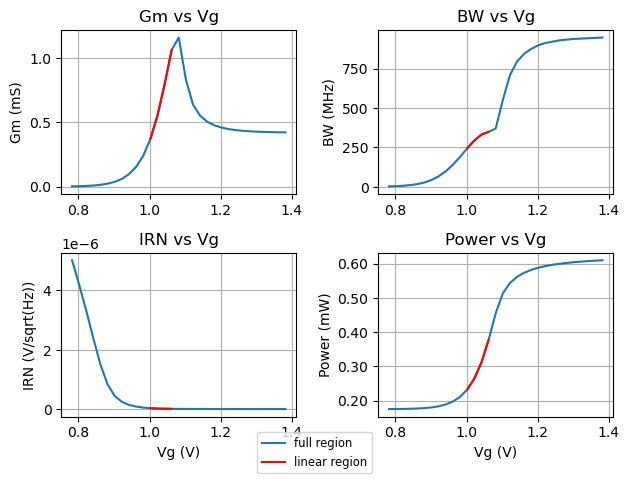

[INFO 12-05 21:00:09] ax.service.ax_client: Completed trial 14 with data: {'vg_region': (0.06, None), 'gm_region': (0.696616, None), 'pw_max': (0.376856, None), 'bw_max': (0.348337, None)}.
[INFO 12-05 21:00:10] ax.service.ax_client: Generated new trial 15 with parameters {'VCM': 1.044508, 'WM1': 10, 'WM3': 24, 'WM4': 15} using model BoTorch.


Best linear region of Vg: 0.925 to 1.105
Best linear region of Gm: 0.26342 to 1.57757


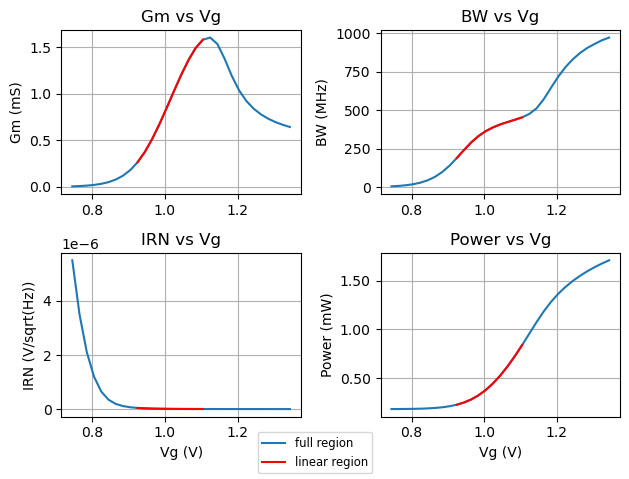

[INFO 12-05 21:00:45] ax.service.ax_client: Completed trial 15 with data: {'vg_region': (0.18, None), 'gm_region': (1.314152, None), 'pw_max': (0.837119, None), 'bw_max': (0.452898, None)}.
[INFO 12-05 21:00:47] ax.service.ax_client: Generated new trial 16 with parameters {'VCM': 1.09227, 'WM1': 5, 'WM3': 5, 'WM4': 13} using model BoTorch.


Best linear region of Vg: 0.912 to 1.152
Best linear region of Gm: 0.14009 to 0.96766


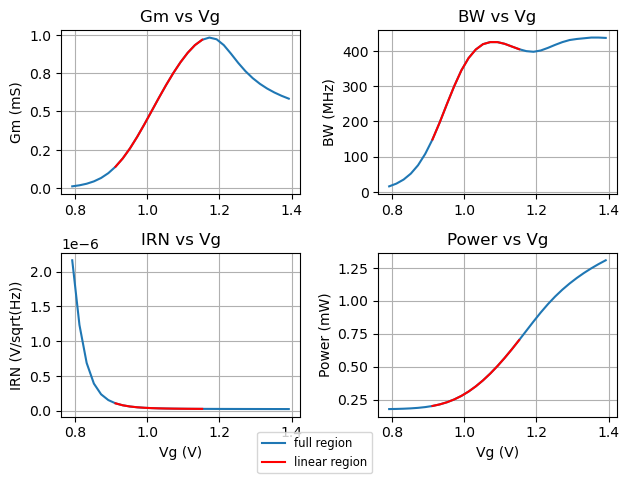

[INFO 12-05 21:01:21] ax.service.ax_client: Completed trial 16 with data: {'vg_region': (0.24, None), 'gm_region': (0.827561, None), 'pw_max': (0.701681, None), 'bw_max': (0.42462, None)}.
[INFO 12-05 21:01:24] ax.service.ax_client: Generated new trial 17 with parameters {'VCM': 1.057768, 'WM1': 8, 'WM3': 17, 'WM4': 16} using model BoTorch.


Best linear region of Vg: 0.918 to 1.138
Best linear region of Gm: 0.20652 to 1.42311


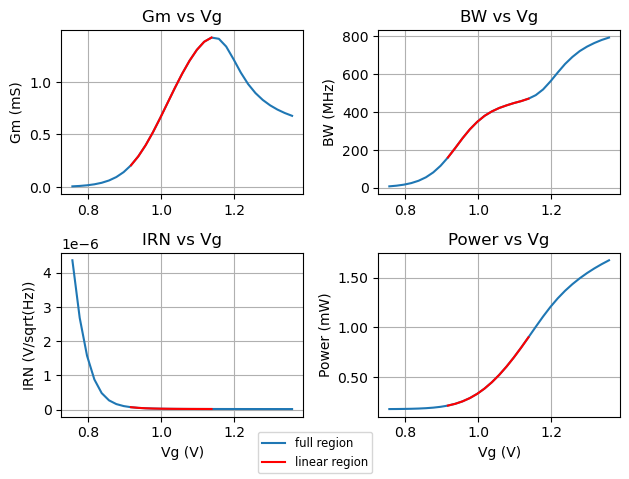

[INFO 12-05 21:01:58] ax.service.ax_client: Completed trial 17 with data: {'vg_region': (0.22, None), 'gm_region': (1.216583, None), 'pw_max': (0.901546, None), 'bw_max': (0.469894, None)}.
[INFO 12-05 21:02:00] ax.service.ax_client: Generated new trial 18 with parameters {'VCM': 0.886188, 'WM1': 4, 'WM3': 50, 'WM4': 15} using model BoTorch.


Best linear region of Vg: 0.686 to 0.986
Best linear region of Gm: 0.12762 to 0.95086


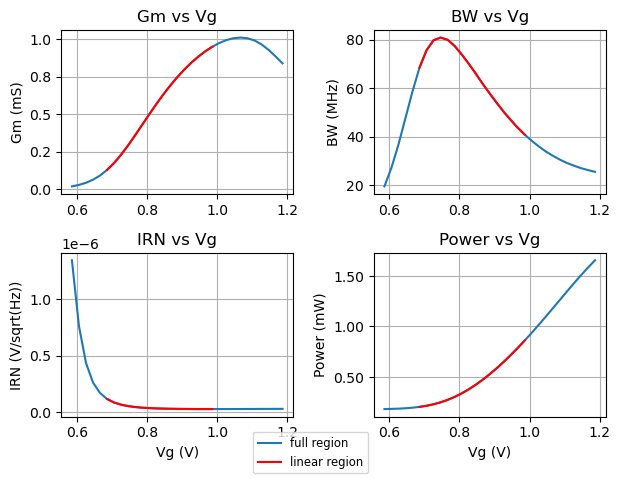

[INFO 12-05 21:02:35] ax.service.ax_client: Completed trial 18 with data: {'vg_region': (0.3, None), 'gm_region': (0.823239, None), 'pw_max': (0.862548, None), 'bw_max': (0.08091, None)}.
[INFO 12-05 21:02:37] ax.service.ax_client: Generated new trial 19 with parameters {'VCM': 1.228748, 'WM1': 4, 'WM3': 4, 'WM4': 36} using model BoTorch.


Best linear region of Vg: 1.029 to 1.309
Best linear region of Gm: 0.12480 to 0.88791


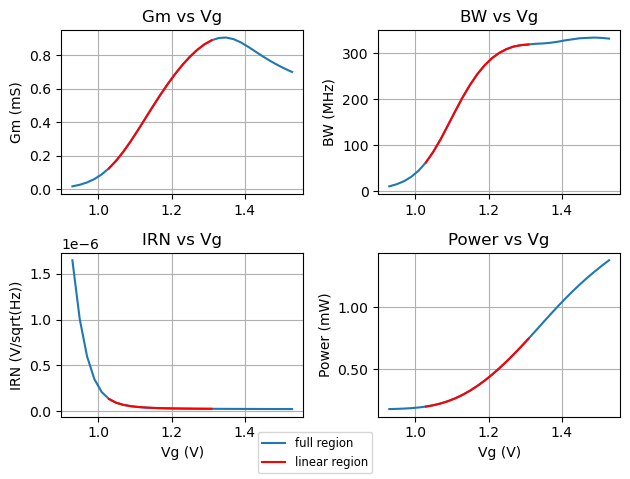

[INFO 12-05 21:03:12] ax.service.ax_client: Completed trial 19 with data: {'vg_region': (0.28, None), 'gm_region': (0.763109, None), 'pw_max': (0.746608, None), 'bw_max': (0.319154, None)}.
[INFO 12-05 21:03:13] ax.service.ax_client: Generated new trial 20 with parameters {'VCM': 0.8, 'WM1': 25, 'WM3': 26, 'WM4': 4} using model BoTorch.


Best linear region of Vg: 0.740 to 0.820
Best linear region of Gm: 0.60876 to 1.86846


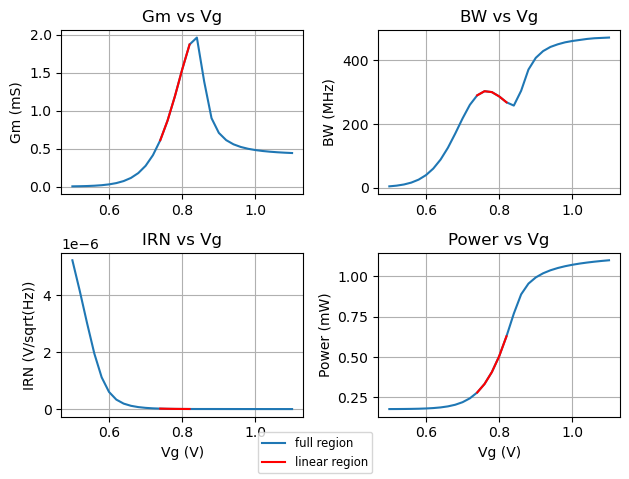

[INFO 12-05 21:03:48] ax.service.ax_client: Completed trial 20 with data: {'vg_region': (0.08, None), 'gm_region': (1.259695, None), 'pw_max': (0.628627, None), 'bw_max': (0.301995, None)}.
[INFO 12-05 21:03:50] ax.service.ax_client: Generated new trial 21 with parameters {'VCM': 1.221214, 'WM1': 4, 'WM3': 50, 'WM4': 50} using model BoTorch.


Best linear region of Vg: 1.001 to 1.321
Best linear region of Gm: 0.09994 to 0.98105


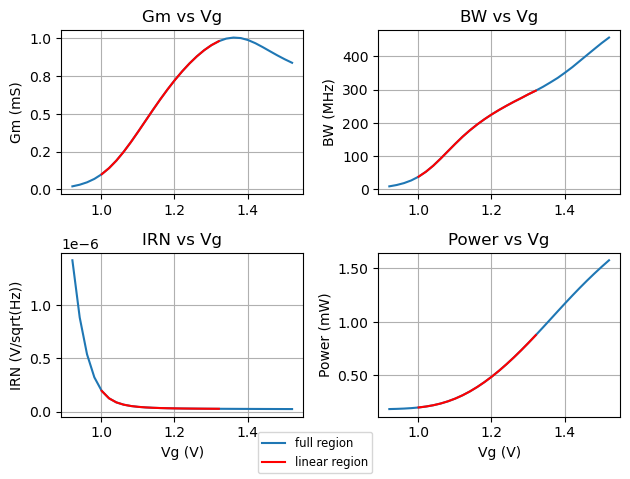

[INFO 12-05 21:04:24] ax.service.ax_client: Completed trial 21 with data: {'vg_region': (0.32, None), 'gm_region': (0.881106, None), 'pw_max': (0.87557, None), 'bw_max': (0.296483, None)}.
[INFO 12-05 21:04:26] ax.service.ax_client: Generated new trial 22 with parameters {'VCM': 1.376181, 'WM1': 4, 'WM3': 28, 'WM4': 50} using model BoTorch.


Best linear region of Vg: 1.156 to 1.416
Best linear region of Gm: 0.10069 to 0.77720


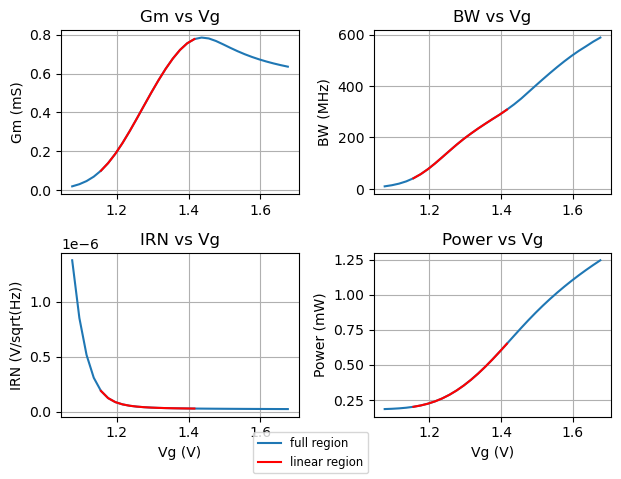

[INFO 12-05 21:05:01] ax.service.ax_client: Completed trial 22 with data: {'vg_region': (0.26, None), 'gm_region': (0.676509, None), 'pw_max': (0.649873, None), 'bw_max': (0.308319, None)}.
[INFO 12-05 21:05:03] ax.service.ax_client: Generated new trial 23 with parameters {'VCM': 1.06412, 'WM1': 7, 'WM3': 15, 'WM4': 17} using model BoTorch.


Best linear region of Vg: 0.924 to 1.144
Best linear region of Gm: 0.22486 to 1.32761


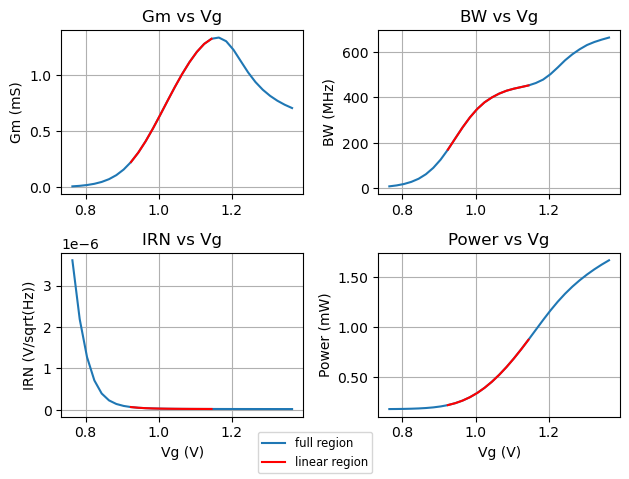

[INFO 12-05 21:05:37] ax.service.ax_client: Completed trial 23 with data: {'vg_region': (0.22, None), 'gm_region': (1.102747, None), 'pw_max': (0.873955, None), 'bw_max': (0.452898, None)}.
[INFO 12-05 21:05:39] ax.service.ax_client: Generated new trial 24 with parameters {'VCM': 1.4, 'WM1': 4, 'WM3': 4, 'WM4': 21} using model BoTorch.


Best linear region of Vg: 1.180 to 1.380
Best linear region of Gm: 0.08815 to 0.60941


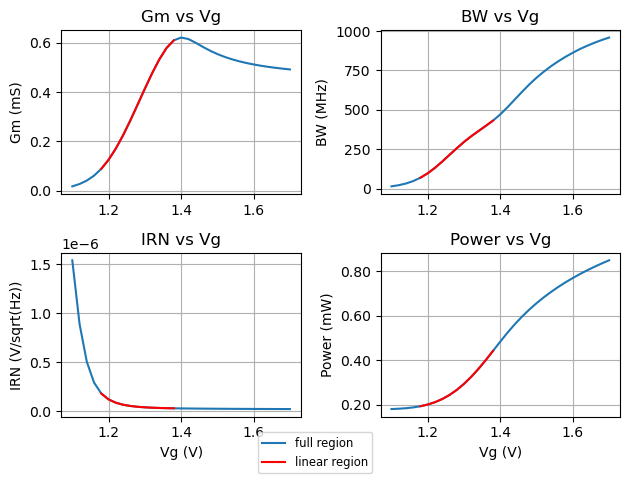

[INFO 12-05 21:06:14] ax.service.ax_client: Completed trial 24 with data: {'vg_region': (0.2, None), 'gm_region': (0.521264, None), 'pw_max': (0.441425, None), 'bw_max': (0.431519, None)}.
[INFO 12-05 21:06:16] ax.service.ax_client: Generated new trial 25 with parameters {'VCM': 1.050689, 'WM1': 8, 'WM3': 16, 'WM4': 18} using model BoTorch.


Best linear region of Vg: 0.911 to 1.131
Best linear region of Gm: 0.20658 to 1.46115


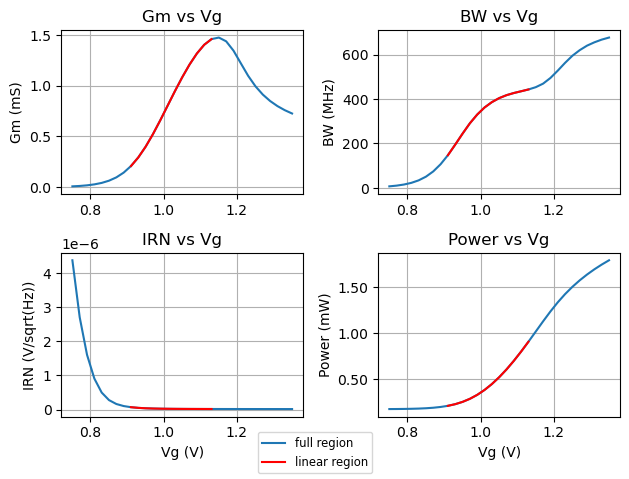

[INFO 12-05 21:06:51] ax.service.ax_client: Completed trial 25 with data: {'vg_region': (0.22, None), 'gm_region': (1.254571, None), 'pw_max': (0.90745, None), 'bw_max': (0.443609, None)}.
[INFO 12-05 21:06:56] ax.service.ax_client: Generated new trial 26 with parameters {'VCM': 1.110269, 'WM1': 7, 'WM3': 16, 'WM4': 21} using model BoTorch.


Best linear region of Vg: 0.970 to 1.190
Best linear region of Gm: 0.22673 to 1.32077


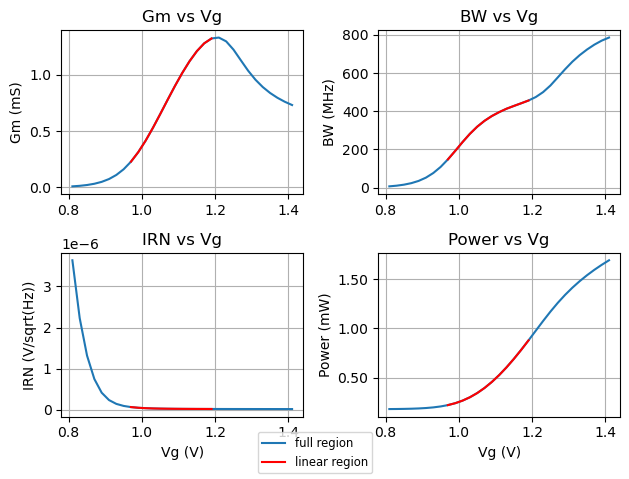

[INFO 12-05 21:07:30] ax.service.ax_client: Completed trial 26 with data: {'vg_region': (0.22, None), 'gm_region': (1.094046, None), 'pw_max': (0.876194, None), 'bw_max': (0.456037, None)}.
[INFO 12-05 21:07:35] ax.service.ax_client: Generated new trial 27 with parameters {'VCM': 1.074124, 'WM1': 7, 'WM3': 16, 'WM4': 21} using model BoTorch.


Best linear region of Vg: 0.934 to 1.154
Best linear region of Gm: 0.22635 to 1.35829


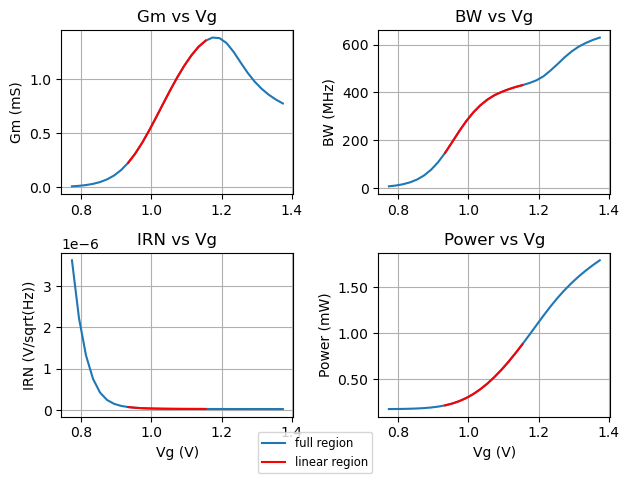

[INFO 12-05 21:08:09] ax.service.ax_client: Completed trial 27 with data: {'vg_region': (0.22, None), 'gm_region': (1.131945, None), 'pw_max': (0.882057, None), 'bw_max': (0.430527, None)}.
[INFO 12-05 21:08:13] ax.service.ax_client: Generated new trial 28 with parameters {'VCM': 0.8, 'WM1': 50, 'WM3': 4, 'WM4': 8} using model BoTorch.


Best linear region of Vg: 0.760 to 0.820
Best linear region of Gm: 0.79914 to 1.98542


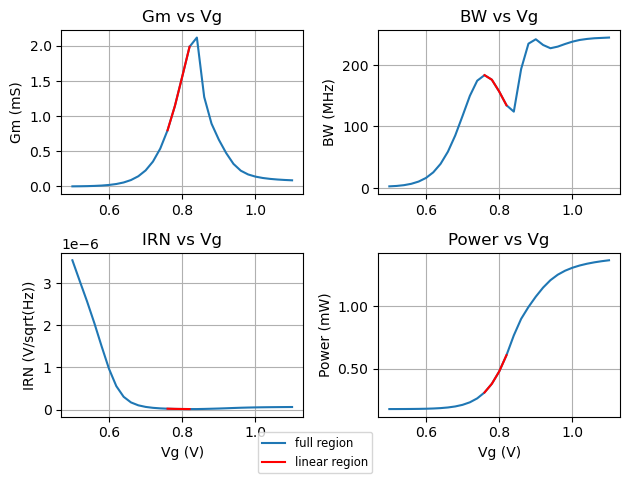

[INFO 12-05 21:08:48] ax.service.ax_client: Completed trial 28 with data: {'vg_region': (0.06, None), 'gm_region': (1.186274, None), 'pw_max': (0.607956, None), 'bw_max': (0.183231, None)}.
[INFO 12-05 21:08:56] ax.service.ax_client: Generated new trial 29 with parameters {'VCM': 1.078838, 'WM1': 7, 'WM3': 17, 'WM4': 16} using model BoTorch.


Best linear region of Vg: 0.939 to 1.139
Best linear region of Gm: 0.22559 to 1.26489


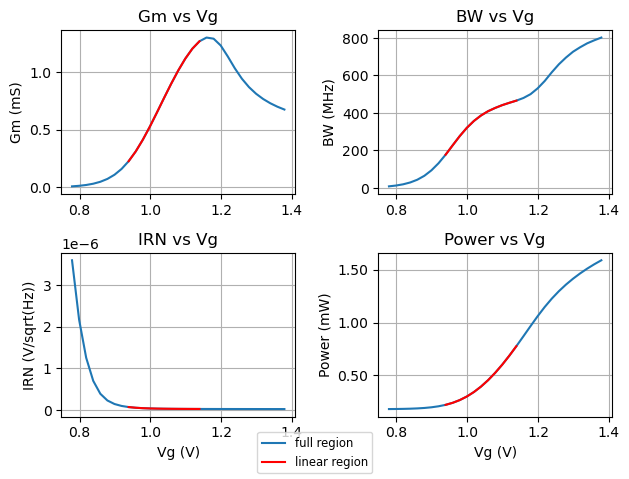

[INFO 12-05 21:09:32] ax.service.ax_client: Completed trial 29 with data: {'vg_region': (0.2, None), 'gm_region': (1.0393, None), 'pw_max': (0.776075, None), 'bw_max': (0.465586, None)}.
[INFO 12-05 21:09:38] ax.service.ax_client: Generated new trial 30 with parameters {'VCM': 1.058657, 'WM1': 8, 'WM3': 16, 'WM4': 21} using model BoTorch.


Best linear region of Vg: 0.919 to 1.139
Best linear region of Gm: 0.20730 to 1.48378


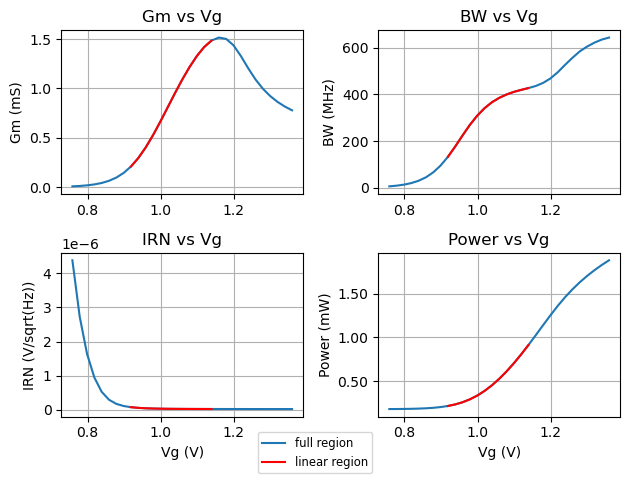

[INFO 12-05 21:10:14] ax.service.ax_client: Completed trial 30 with data: {'vg_region': (0.22, None), 'gm_region': (1.276485, None), 'pw_max': (0.912563, None), 'bw_max': (0.42658, None)}.
[INFO 12-05 21:10:22] ax.service.ax_client: Generated new trial 31 with parameters {'VCM': 1.095115, 'WM1': 6, 'WM3': 14, 'WM4': 23} using model BoTorch.


Best linear region of Vg: 0.935 to 1.175
Best linear region of Gm: 0.17851 to 1.23298


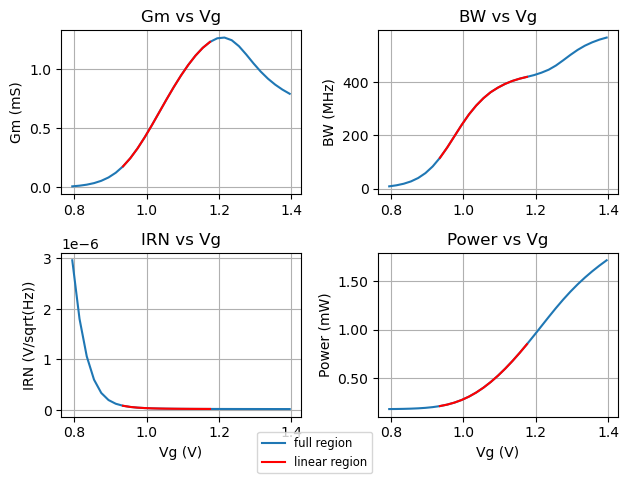

[INFO 12-05 21:10:56] ax.service.ax_client: Completed trial 31 with data: {'vg_region': (0.24, None), 'gm_region': (1.054475, None), 'pw_max': (0.850441, None), 'bw_max': (0.420727, None)}.
[INFO 12-05 21:11:05] ax.service.ax_client: Generated new trial 32 with parameters {'VCM': 1.15395, 'WM1': 9, 'WM3': 21, 'WM4': 32} using model BoTorch.


Best linear region of Vg: 1.034 to 1.234
Best linear region of Gm: 0.28251 to 1.55524


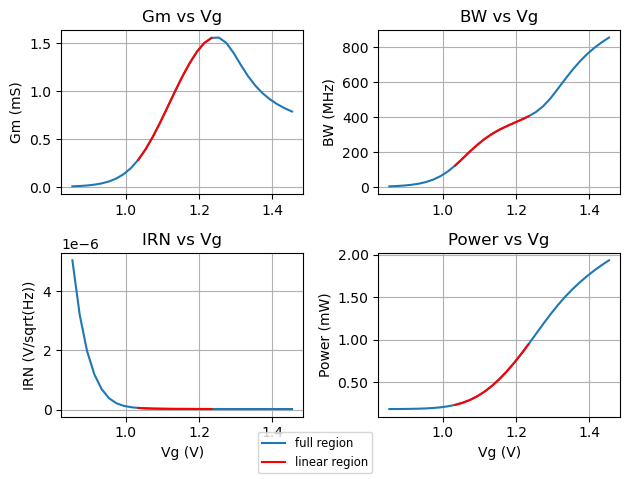

[INFO 12-05 21:11:39] ax.service.ax_client: Completed trial 32 with data: {'vg_region': (0.2, None), 'gm_region': (1.272735, None), 'pw_max': (0.944739, None), 'bw_max': (0.404576, None)}.
[INFO 12-05 21:11:47] ax.service.ax_client: Generated new trial 33 with parameters {'VCM': 1.4, 'WM1': 4, 'WM3': 50, 'WM4': 28} using model BoTorch.


Best linear region of Vg: 1.180 to 1.400
Best linear region of Gm: 0.10051 to 0.62770


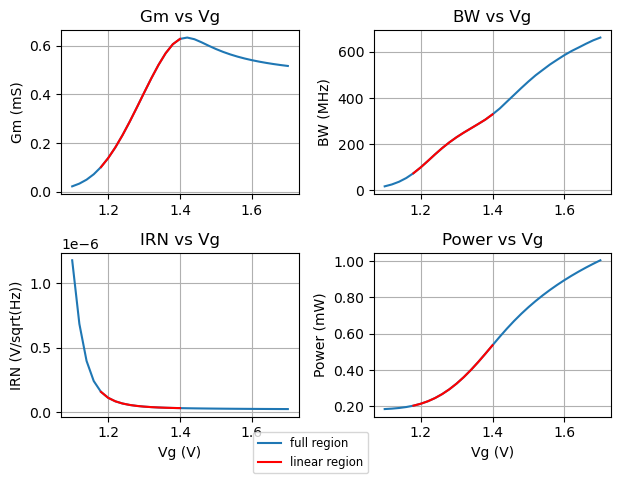

[INFO 12-05 21:12:22] ax.service.ax_client: Completed trial 33 with data: {'vg_region': (0.22, None), 'gm_region': (0.527191, None), 'pw_max': (0.535705, None), 'bw_max': (0.328852, None)}.
[INFO 12-05 21:12:36] ax.service.ax_client: Generated new trial 34 with parameters {'VCM': 1.035942, 'WM1': 7, 'WM3': 15, 'WM4': 13} using model BoTorch.


Best linear region of Vg: 0.896 to 1.096
Best linear region of Gm: 0.22340 to 1.26213


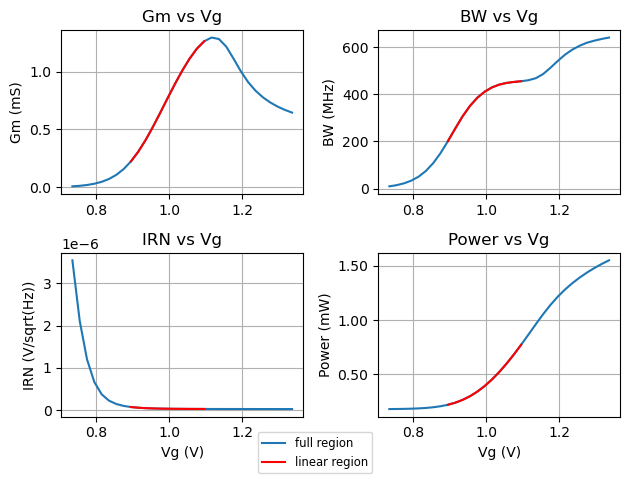

[INFO 12-05 21:13:10] ax.service.ax_client: Completed trial 34 with data: {'vg_region': (0.2, None), 'gm_region': (1.03873, None), 'pw_max': (0.771902, None), 'bw_max': (0.454988, None)}.
[INFO 12-05 21:13:23] ax.service.ax_client: Generated new trial 35 with parameters {'VCM': 1.096901, 'WM1': 7, 'WM3': 14, 'WM4': 22} using model BoTorch.


Best linear region of Vg: 0.957 to 1.177
Best linear region of Gm: 0.22581 to 1.34129


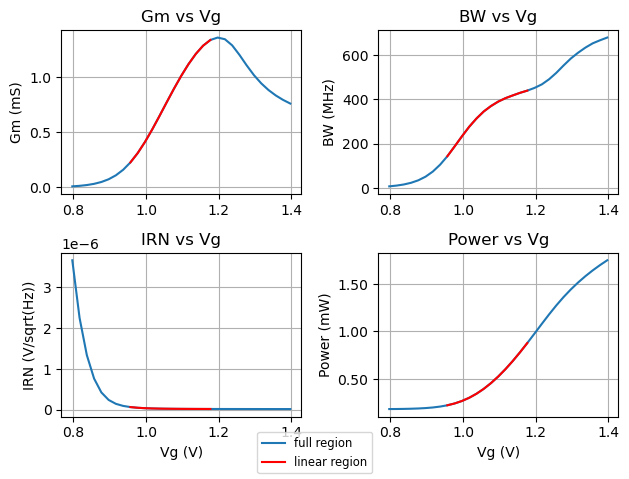

[INFO 12-05 21:13:57] ax.service.ax_client: Completed trial 35 with data: {'vg_region': (0.22, None), 'gm_region': (1.115478, None), 'pw_max': (0.877717, None), 'bw_max': (0.438531, None)}.


In [32]:
for i in range(args.num_epochs):
    parameters, trial_index = ax_client.get_next_trial()
    # Local evaluation here can be replaced with deployment to external system.
    ax_client.complete_trial(trial_index=trial_index, raw_data=evaluate(parameters))

In [33]:
ax_client.get_max_parallelism()

[(8, 8), (-1, 3)]

In [34]:
ax_client.get_trials_data_frame()

[WARNING 12-05 21:13:57] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.


,trial_index,arm_name,trial_status,generation_method,is_feasible,bw_max,gm_region,pw_max,vg_region,VCM,WM1,WM3,WM4
0,0,0_0,COMPLETED,Manual,False,0.415911,0.879358,0.503756,0.12,1.300000,12,10,20
1,1,1_0,COMPLETED,Sobol,False,0.208449,2.240115,1.522588,0.20,0.853363,15,18,44
2,2,2_0,COMPLETED,Sobol,False,0.379315,2.096994,1.166837,0.16,0.951378,19,27,16
3,3,3_0,COMPLETED,Sobol,False,0.311889,0.503332,0.333181,0.06,1.290777,26,37,7
4,4,4_0,COMPLETED,Sobol,False,0.251189,2.213884,0.927794,0.08,1.134392,49,50,32
5,5,5_0,COMPLETED,Sobol,False,0.219786,0.974365,0.487737,0.08,1.399598,41,7,47
6,6,6_0,COMPLETED,Sobol,False,0.268534,1.036089,0.533305,0.08,1.330803,25,32,36
7,7,7_0,COMPLETED,Sobol,False,0.270396,1.374362,0.672218,0.10,1.307014,25,39,44
8,8,8_0,COMPLETED,Sobol,False,0.298538,2.807687,1.430743,0.12,1.042706,35,36,36
9,9,9_0,COMPLETED,BoTorch,False,0.454988,1.459199,0.871604,0.16,1.071051,13,13,17


Through optimization trials, there will be more feasible parameter combinations which statisfy the multiple objectivies. 

In [35]:
optimal_dict = ax_client.get_pareto_optimal_parameters()
optimal_dict

/home/GmTune/.conda/lib/python3.11/site-packages/ax/modelbridge/modelbridge_utils.py:878: UserWarning: FYI: The default behavior of `get_pareto_frontier_and_configs` when `transform_outcomes_and_configs` is not specified has changed. Previously, the default was `transform_outcomes_and_configs=True`; now this argument is deprecated and behavior is as if `transform_outcomes_and_configs=False`. You did not specify `transform_outcomes_and_configs`, so this warning requires no action.
  frontier_observations, f, obj_w, obj_t = get_pareto_frontier_and_configs(


OrderedDict([(35,
              ({'VCM': 1.0969007244284537, 'WM1': 7, 'WM3': 14, 'WM4': 22},
               ({'bw_max': 0.43968981818531855,
                 'gm_region': 1.1219677591222181,
                 'pw_max': 0.8731782992752898,
                 'vg_region': 0.22425722118775407},
                {'bw_max': {'bw_max': 5.5325778099080876e-06,
                  'gm_region': 0.0,
                  'pw_max': 0.0,
                  'vg_region': 0.0},
                 'gm_region': {'bw_max': 0.0,
                  'gm_region': 0.00013365229285538973,
                  'pw_max': 0.0,
                  'vg_region': 0.0},
                 'pw_max': {'bw_max': 0.0,
                  'gm_region': 0.0,
                  'pw_max': 0.00020957857509552253,
                  'vg_region': 0.0},
                 'vg_region': {'bw_max': 0.0,
                  'gm_region': 0.0,
                  'pw_max': 0.0,
                  'vg_region': 1.6449318009411794e-05}}))),
             (27,
         

#### [Back to List of Content](#list_of_content)

---

### Step 4. Circuit Backtesting

Now, we can do backtesting using SPICE simulation with one or more feasible combinations of parameters. First, we will print the `keys` of feasible trials.

In [36]:
print("Feasible Trials:", optimal_dict.keys())

Feasible Trials: odict_keys([35, 27, 23, 25, 30, 26, 29, 31, 34, 17])


You may manually select one from the available trials and load the optimized parameters as `VCM_opt`, `WM1_opt`, `WM3_opt`. and `WM4_opt`.

In [41]:
backtest_key = 35
VCM_opt, WM1_opt, WM3_opt, WM4_opt = optimal_dict[backtest_key][0].values()
print(
    "Optimal VCM: {:.3f} V\n"
    "Optimal WM1: {:d} \n"
    "Optimal WM3: {:d} \n"
    "Optimal WM4: {:d} \n"
    .format(
        VCM_opt,
        WM1_opt,
        WM3_opt,
        WM4_opt
    )
)

Optimal VCM: 1.097 V
Optimal WM1: 7 
Optimal WM3: 14 
Optimal WM4: 22 



In [42]:
# Initialize the GmSpice model with optimized parameters
GmTuneOpt = mdl.GmSpice(
    VDD = args.VDD,
    VCM = VCM_opt,
    WM1 = WM1_opt,
    WM3 = WM3_opt,
    WM4 = WM4_opt,
    VG_step = args.VG_step,
    linear_threshold=args.linear_threshold,
    spice_path = SPICE_PATH,
    ckpt_path = CKPT_PATH,
    verbose = True
)

Netlist file wroten at src/spice//GmCMFF.spice



No compatibility mode selected!


Circuit: ** sch_path: /home/gmtune/src/spice/gmcmff.sch

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 1
i(vi1) = 4.977647e-05
i(vi2) = 1.506357e-07
i(vi3) = 1.506357e-07
i(vi4) = 2.559802e-04
i(vio1) = 1.421085e-14
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 3001
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 101

No. of Data Rows : 1
 


No compatibility mode selected!


Circuit: ** sch_path: /home/gmtune/src/spice/gmcmff.sch

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 1
i(vi1) = 4.977544e-05
i(vi2) = 2.473464e-07
i(vi3) = 2.473464e-07
i(vi4) = 2.559802e-04
i(vio1) = -1.42109e-14
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 3001
Doing analysis at TEMP = 27.000000 and TNOM = 27.000

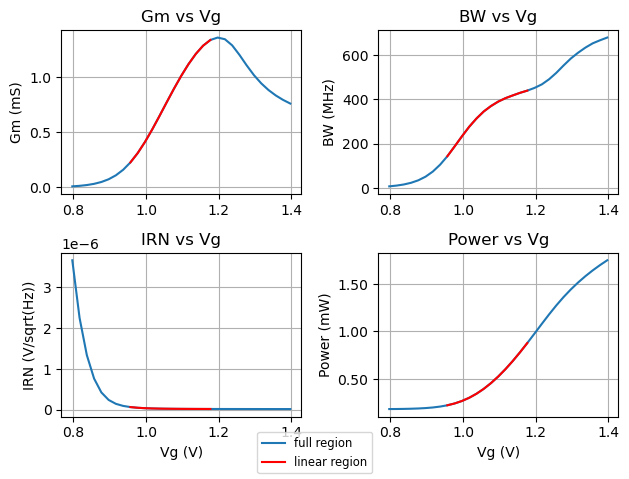

In [43]:
# Run the optimal configuration
vg_region, gm_region, pw_max, bw_max, irn = GmTuneOpt(args.VG_swing)

In [44]:
print(
    "Maximum Tunable Range of Vg: {:.3f} V\n"
    "Maximum Tunable Range of Gm: {:.3f} mA/V\n"
    "Maximum Power Consumption: {:.3f} mW\n"
    "Maximum Bandwidth: {:.3f} GHz\n"
    "Input Referred Noise: {:.3f} nV/sqrt(Hz) @ 50 MHz\n"
    .format(
        vg_region, 
        gm_region,
        pw_max,
        bw_max,
        irn
    )
)

Maximum Tunable Range of Vg: 0.220 V
Maximum Tunable Range of Gm: 1.115 mA/V
Maximum Power Consumption: 0.878 mW
Maximum Bandwidth: 0.439 GHz
Input Referred Noise: 19.703 nV/sqrt(Hz) @ 50 MHz



#### [Back to List of Content](#list_of_content)

---

## Results and Discussion

We obtained the optimal parameters from various experiments.
- Performance under Different Thresholds
- Performance under Different VDDs
- Benchamrk among Multiple Technologies

### Performance under Different Thresholds

1. Obtian better overall performance (larger linear region and lower power) comparing to [[1]](#ref1). 

    The optimized circuit parameters are `VCM=1.12`, `WM1=8`, `WM3=17`, `WM4=22`, and the resulted input referred noise at 50 MHz is `IRN=18.5`.

    \begin{array}{|c|c|c|c|c|}
    \hline
    & Vg \ Range \ (V) & Gm \ Range \ (mA/V) & Power \ (mW) & Bandwidth \ (GHz)\\
    \hline
    Threshold & 0.15 & 0.68 & 1.10 & 0.40\\
    \hline
    Result & 0.22 & 1.21 & 0.91 & 0.45\\
    \hline
    \end{array}

2. Obtian larger linear region and lower power consumption without considering bandwidth. 

    The optimized circuit parameters are `VCM=1.00`, `WM1=8`, `WM3=23`, `WM4=21`, and the resulted input referred noise at 50 MHz is `IRN=18.1`.

    \begin{array}{|c|c|c|c|c|}
    \hline
    & Vg \ Range \ (V) & Gm \ Range \ (mA/V) & Power \ (mW) & Bandwidth \ (GHz)\\
    \hline
    Threshold & 0.20 & 1.2 & 1.10 & 0.2\\
    \hline
    Result & 0.24 & 1.38 & 1.04 & 0.38\\
    \hline
    \end{array}

2. Obtian larger linear region without considering power consumption and bandwidth. 

    The optimized circuit parameters are `VCM=0.93`, `WM1=8`, `WM3=26`, `WM4=59`, and the resulted input referred noise at 50 MHz is `IRN=18.2`.

    \begin{array}{|c|c|c|c|c|}
    \hline
    & Vg \ Range \ (V) & Gm \ Range \ (mA/V) & Power \ (mW) & Bandwidth \ (GHz)\\
    \hline
    Threshold & 0.25 & 1.50 & 1.50 & 0.20\\
    \hline
    Result & 0.28 & 1.65 & 1.35 & 0.21\\
    \hline
    \end{array}


### Performance under Different VDDs

Based on same threshold `Vg_threshold = 0.15`, `Gm_threshold = 0.7`, `Power_threshold = 1.1`, and `Bandwidth_threshold = 0.2`.

\begin{array}{|c|c|c|c|c|c|}
\hline
 VDDs \ (V) & 1.6 & 1.7 & 1.8 & 1.9 & 2.0\\
\hline
Vg \ Range \ (V) & 0.22 & 0.20 & 0.30 & 0.24 & 0.24\\
\hline
Gm \ Range \ (mA/V) & 0.75 & 0.80 & 0.85 & 1.04 & 1.00\\
\hline
Max \ Power \ (mW) & 0.56 & 0.71 & 0.79 & 0.91 & 0.98\\
\hline
Bandwidth \ (GHz) & 0.34 & 0.35 & 0.38 & 0.40 & 0.51\\
\hline
IRN \ (nV/\sqrt{Hz}) & 24.4 & 18.8 & 26.0 & 16.9 & 20.8\\
\hline
\end{array}

### Benchamrk among Multiple Technologies

The length ($L$) for all transistors are set to 0.5.

\begin{array}{|c|c|c|c|c|}
\hline
Technology & AMS \ 0.35 \mu m & TSMC \ 130 nm & SKY \ 130 nm & SKY \ 130 nm \ (Opt) \\
\hline
VDD \ (V) & 1.8 & 1.8 & 1.8 & 1.8 \\
\hline
VCM \ (V) & 1.3 & 1.3 & 1.3 & 1.12\\
\hline
WM1 = WM2 & 12 & 12 & 12 & 8\\
\hline
WM3 & 10 & 10 & 10 & 17\\
\hline
WM4 & 20 & 20 & 20 & 22\\
\hline
\\
\hline
Vg \ Range \ (V) & 0.15 & 0.16 & 0.12 & 0.22\\
\hline
Gm \ Range \ (mA/V) & 0.68 & 1.04 & 0.88 & 1.21\\
\hline
Max \ Power \ (mW) & 1.1 & 1.8 & 0.5 & 0.91\\
\hline
Bandwidth \ (GHz) & 0.6 & 0.6 & 0.4 & 0.45\\
\hline
IRN \ (nV/\sqrt{Hz})& 13.4 & 22.5 & 18.6 & 18.5\\
\hline
\end{array}


<hr style="border:2px solid grey">

## Conclusion

In conclusion, GmTune provides a robust and efficient solution for the design of linearly tunable transconductors, leveraging AI-driven multi-objective optimization to address the inherent trade-offs in circuit design. The integration of automated SPICE simulations, performance metric evaluation, and linearity analysis ensures that the design is both efficient and effective across a wide range of operating conditions. By identifying the optimal parameter set, the system enhances circuit performance with reduced power consumption, expanded linear operating regions, and improved noise characteristics. Key features of GmTune include

- **Automated SPICE Simulations:** Integrates with SPICE to perform circuit analysis.
- **Performance Metrics:** Evaluates critical circuit parameters such as Gm, bandwidth, noise, and power.
- **Linearity Analysis:** Identifies the region of operation where the circuit behaves linearly.
- **Visualization:** Provides plots for better understanding and debugging.

The methodology is adaptable across different fabrication processes and offers a foundation for the development of high-performance, low-power analog circuits, with promising applications in emerging technologies. Future work will focus on further optimizing the design by refining the Bayesian optimization process and extending its applicability to more complex circuits.

<hr style="border:2px solid grey">

## References

[1]<a id="ref1"></a> B. Calvo, et al., "Low-voltage linearly tunable CMOS transconductor with common-mode feedforward," in IEEE Trans. Circuits Syst. I: Reg. Papers, vol. 55, no. 3, pp. 715-721, April 2008.

[2]<a id="ref2"></a> SkyWater SKY130 PDK, available online at: https://github.com/google/skywater-pdk.

[3]<a id="ref3"></a> Ngspice Circuit Simulator, avalable online at: http://www.ngspice.org.

[4]<a id="ref4"></a> Bakshy E, et al., "AE: A domain-agnostic platform for adaptive experimentation," in Proc. Conf. Neural Inf. Process. Syst. (NeuraIPS), Dec. 2018, pp. 1-8.

[5]<a id="ref5"></a> Ax, availale online at: https://github.com/facebook/Ax